# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data is associated with the publication:

Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025) A flexible hippocampal population code for experience relative to reward (Version 0.250406.0045) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001361/0.250406.0045

You can find the Dandiset at: [https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

**Abstract:**
To reinforce rewarding behaviors, events leading up to and following rewards must be remembered. Hippocampal place cell activity spans spatial and non-spatial episodes, but whether hippocampal activity encodes entire sequences of events relative to reward is unknown. To test this, we performed two-photon imaging of hippocampal CA1 as mice navigated virtual environments with changing hidden reward locations. When the reward moved, a subpopulation of neurons updated their firing fields to the same relative position with respect to reward, constructing behavioral timescale sequences spanning the entire task. Over learning, this reward-relative representation became more robust as additional neurons were recruited, and changes in reward-relative firing often preceded behavioral adaptations following reward relocation. Concurrently, the spatial environment code was maintained through a parallel, dynamic subpopulation rather than through dedicated cell classes. These findings reveal how hippocampal ensembles flexibly encode multiple aspects of experience while amplifying behaviorally relevant information.

## Notebook Goals

This notebook will guide you through:
1. Listing required packages.
2. Loading the Dandiset metadata using the DANDI API.
3. Listing some assets (NWB files) within the Dandiset.
4. Loading a specific NWB file and exploring its basic metadata.
5. Summarizing the contents of the NWB file.
6. Visualizing behavioral data: mouse position over time.
7. Visualizing ophysiology data:
    - Fluorescence traces for selected Regions of Interest (ROIs).
    - ROI masks overlaid on the mean image.
8. Summarizing findings and suggesting potential future directions.

## Required Packages

To run this notebook, you'll need the following Python packages. We assume these are already installed in your environment.
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `dandi`
- `seaborn`

## Loading the Dandiset with DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001361"
dandiset_version = "0.250406.0045"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')[:200]}...") # Truncate description

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Use asset.identifier

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Dandiset description: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience rel...

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Loading an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents. We'll use the file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.

The URL for this asset can be constructed using its asset ID: `d77ea78a-8978-461d-9d11-3c5cef860d82`.
The full download URL is: `https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/`

In [2]:
import pynwb
import h5py
import remfile
import numpy as np # For array operations later
import matplotlib.pyplot as plt
import seaborn as sns

# NWB file URL (hard-coded as per instructions based on tool_cli.py output)
nwb_asset_id = "d77ea78a-8978-461d-9d11-3c5cef860d82"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"Loading NWB file from: {nwb_file_url}")

# Load the NWB file
# This might take a moment as it's accessing the file remotely
try:
    remote_file = remfile.File(nwb_file_url)
    h5_file = h5py.File(remote_file, mode='r') # Explicitly set mode to read
    io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Explicitly set mode to read
    nwb = io.read()
    print("\nNWB file loaded successfully.")

    # Display some basic metadata from the NWB file
    print(f"\nSession Description: {nwb.session_description}")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session Start Time: {nwb.session_start_time}")
    print(f"Experimenter: {nwb.experimenter}")
    print(f"Subject ID: {nwb.subject.subject_id}")
    print(f"Subject Species: {nwb.subject.species}")

except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwb = None # Set nwb to None if loading fails

Loading NWB file from: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.

Session Description: processed suite2p data
Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session Start Time: 2023-02-23 00:00:00-08:00
Experimenter: ('Mari Sosa',)
Subject ID: m11
Subject Species: Mus musculus


### Neurosift Link
You can explore this NWB file interactively on Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045)

### Summarizing NWB File Contents

The NWB file format organizes data into several groups. Here's a brief summary of common groups you might find and what this specific file (`sub-m11/sub-m11_ses-03_behavior+ophys.nwb`) contains. This file captures data from a mouse navigating a virtual reality environment while its neural activity in hippocampal area CA1 is recorded using 2-photon microscopy.

*   **`session_description`**: A brief description of the session. (e.g., "processed suite2p data")
*   **`identifier`**: A unique identifier for the NWB file. (e.g., "/data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A")
*   **`session_start_time`**: The start time of the recording session.
*   **`subject`**: Information about the subject, such as ID, species, age, sex.
    *   `subject_id`: m11
    *   `species`: Mus musculus
*   **`acquisition`**: Raw acquired data, often continuous signals.
    *   `TwoPhotonSeries`: Contains the raw 2-photon imaging data.
        *   `data`: The actual imaging data (shape (1,1,1) in this case, which is unusual and likely a placeholder or reference, not the full timeseries data. Full data is typically very large and not loaded by default).
        *   `dimension`: [512 796] (pixels)
        *   `imaging_plane`: Details about the imaging plane (e.g., location 'hippocampus, CA1', indicator 'GCaMP7f').
*   **`processing`**: Processed data derived from raw acquisition data.
    *   `behavior`: Behavioral data.
        *   `BehavioralTimeSeries`: Contains various time series related to behavior.
            *   `Reward`: Time series of reward delivery. (69 events)
            *   `autoreward`: Whether a trial was automatically rewarded. (20684 timestamps)
            *   `environment`: Virtual reality environment. (20684 timestamps)
            *   `lick`: Lick detection. (20684 timestamps)
            *   `position`: Position in a virtual linear track. (20684 timestamps)
            *   `reward_zone`: Reward zone entry. (20684 timestamps)
            *   `scanning`: Whether scanning occurred. (20684 timestamps)
            *   `speed`: Speed of the subject. (20684 timestamps)
            *   `teleport`: End of a trial. (20684 timestamps)
            *   `trial number`: Trial number. (20684 timestamps)
            *   `trial_start`: Start of a trial. (20684 timestamps)
    *   `ophys`: Optical physiology processed data.
        *   `Backgrounds_0`: Background images from 2-photon imaging.
            *   `Vcorr`, `max_proj`, `meanImg`: Different types of background/summary images.
        *   `Deconvolved`: Deconvolved fluorescence traces (likely representing inferred neural activity).
            *   `plane0` (RoiResponseSeries): Deconvolved activity for 349 ROIs over 19818 timepoints.
        *   `Fluorescence`: Fluorescence traces (e.g., dF/F).
            *   `plane0` (RoiResponseSeries): Fluorescence activity for 349 ROIs over 19818 timepoints.
        *   `ImageSegmentation`: Information about segmented ROIs.
            *   `PlaneSegmentation`: Contains masks and properties of detected ROIs (349 ROIs).
                *   `colnames`: ['pixel_mask', 'iscell', 'planeIdx']
                *   `id`: Unique IDs for each ROI.
                *   `pixel_mask`: Defines the pixels belonging to each ROI.
                *   `iscell`: Indicates if an ROI is classified as a cell.
        *   `Neuropil`: Neuropil fluorescence traces (background fluorescence near ROIs).
            *   `plane0` (RoiResponseSeries): Neuropil activity for 349 ROIs over 19818 timepoints.

To get a list of what's in a specific group, you can use Python's `dir()` function or iterate over dictionary keys if the object supports it. For example, `nwb.processing["behavior"]["BehavioralTimeSeries"].time_series.keys()` would list available behavioral time series.

## Visualizing Behavioral Data

### Mouse Position Over Time

Let's plot the mouse's position on the virtual linear track over the course of the session.

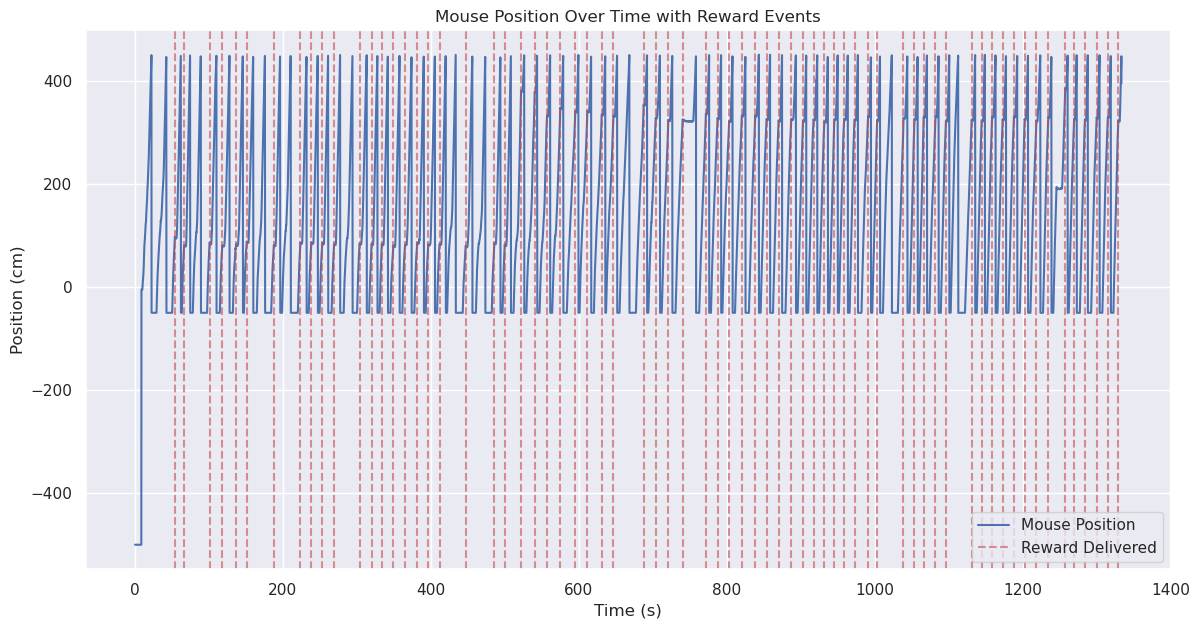

In [3]:
if nwb:
    try:
        position_timeseries = nwb.processing["behavior"]["BehavioralTimeSeries"].time_series["position"]
        position_timeseries = nwb.processing["behavior"]["BehavioralTimeSeries"].time_series["position"]
        position_data = position_timeseries.data[:] # Load all position data
        position_timestamps = position_timeseries.timestamps[:] # Load all position timestamps

        # Attempt to load reward times
        reward_times = None
        try:
            reward_timeseries = nwb.processing["behavior"]["BehavioralTimeSeries"].time_series["Reward"]
            # Reward timestamps indicate when rewards were delivered
            reward_timestamps = reward_timeseries.timestamps[:]
            if reward_timestamps.size > 0:
                 reward_times = reward_timestamps
        except KeyError:
            print("Reward data not found.")
        except Exception as e:
            print(f"Error loading reward data: {e}")

        sns.set_theme()
        plt.figure(figsize=(14, 7)) # Increased figure size slightly
        plt.plot(position_timestamps, position_data, label="Mouse Position")
        
        # If reward times are available, plot them as vertical lines
        if reward_times is not None:
            for R_time in reward_times:
                plt.axvline(x=R_time, color='r', linestyle='--', alpha=0.6, label='Reward Delivered' if 'Reward Delivered' not in plt.gca().get_legend_handles_labels()[1] else "") # Only label once
            plt.legend()

        plt.xlabel("Time (s)")
        plt.ylabel(f"Position ({position_timeseries.unit})")
        plt.title("Mouse Position Over Time with Reward Events")
        plt.grid(True)
        plt.show()
    except KeyError:
        print("Position data not found in the NWB file.")
    except Exception as e:
        print(f"An error occurred while plotting position data: {e}")
else:
    print("NWB file not loaded. Skipping position plot.")

The plot above shows the mouse's movement along the linear track. The y-axis represents the position in centimeters, and the x-axis represents time in seconds. We can observe periods of movement and potentially identify patterns related to task performance, such as laps or visits to specific zones. The rapid oscillations suggest the mouse moving back and forth on the track.

## Visualizing Ophysiology Data

Now, let's look at some of the 2-photon imaging data. We will focus on the processed deconvolved fluorescence traces, which are often used as a proxy for neural activity.

### Fluorescence Traces for Selected ROIs

We will select the first few ROIs that are classified as cells and plot their deconvolved fluorescence traces.

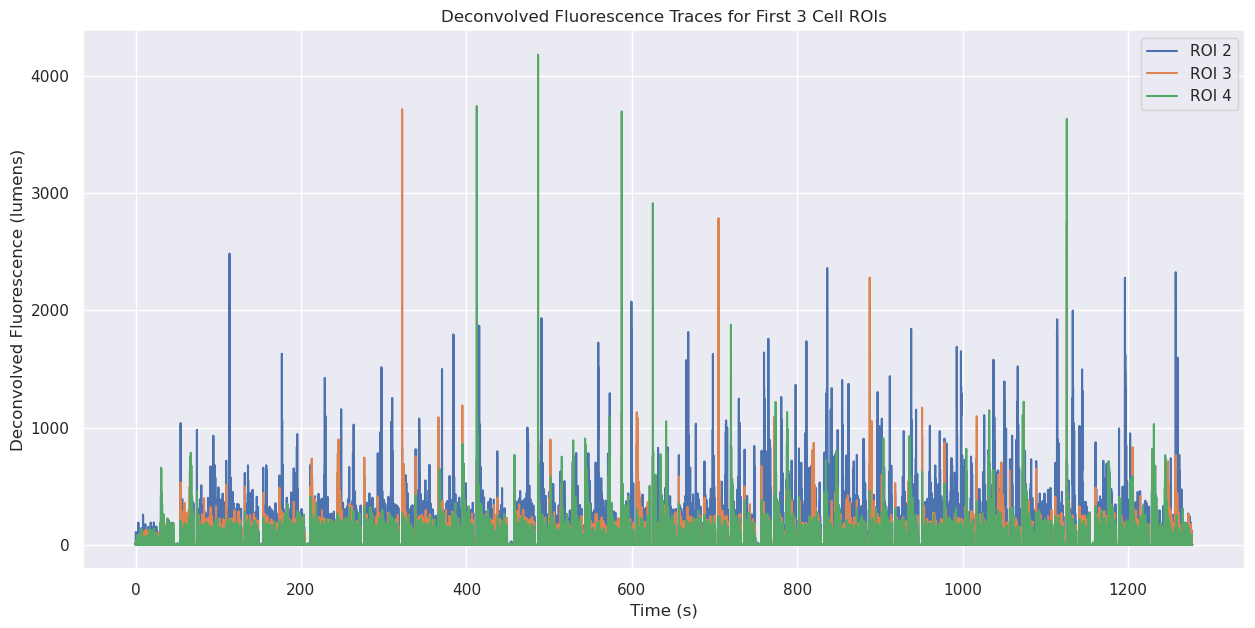

In [4]:
if nwb:
    try:
        # Get ROI fluorescence data (Deconvolved)
        deconv_series = nwb.processing["ophys"]["Deconvolved"].roi_response_series["plane0"]
        deconv_data = deconv_series.data # This is an HDF5 dataset

        # Get ROI table and select first 3 cell ROIs
        roi_table = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"]
        is_cell_column = roi_table["iscell"][:]  # Load iscell data into memory
        # iscell has two columns, the first is the classification (1 for cell, 0 for not)
        cell_indices = np.where(is_cell_column[:, 0] == 1)[0]

        if len(cell_indices) >= 3:
            selected_roi_indices_in_cells_array = cell_indices[:3] # Get the actual indices from the full ROI table
            selected_roi_ids = roi_table.id[selected_roi_indices_in_cells_array]

            # Create timestamps based on the data shape and rate
            num_timepoints = deconv_data.shape[0]
            timestamps = np.arange(num_timepoints) / deconv_series.rate

            # Create plot
            sns.set_theme()
            plt.figure(figsize=(15, 7))
            for i, roi_idx in enumerate(selected_roi_indices_in_cells_array):
                roi_id = selected_roi_ids[i]
                # Load data for one ROI at a time to manage memory
                roi_fluorescence = deconv_data[:num_timepoints, roi_idx]
                plt.plot(timestamps, roi_fluorescence, label=f"ROI {roi_id}")

            plt.xlabel(f"Time (s)")
            plt.ylabel(f"Deconvolved Fluorescence ({deconv_series.unit})")
            plt.title(f"Deconvolved Fluorescence Traces for First {len(selected_roi_ids)} Cell ROIs")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"Found only {len(cell_indices)} cells, need at least 3 to plot.")

    except KeyError as e:
        print(f"Ophysiology data (Deconvolved or ImageSegmentation) not found: {e}")
    except Exception as e:
        print(f"An error occurred while plotting ROI fluorescence: {e}")
else:
    print("NWB file not loaded. Skipping ROI fluorescence plot.")

This plot displays the deconvolved fluorescence activity for the first three identified cells (ROIs) from hippocampal area CA1. Each trace represents the activity of a single ROI over time. The y-axis shows fluorescence in "lumens" (as specified in the NWB file metadata for `RoiResponseSeries`), which in this context represents the inferred neural activity after deconvolution. Peaks in these traces are indicative of neural firing events. We can observe the temporal dynamics of individual neurons and look for patterns of correlated or uncorrelated activity among them, potentially related to the mouse's behavior in the virtual environment.

### ROI Masks Overlaid on Mean Image

To understand where these ROIs are located in the field of view, we can plot their spatial masks on top of the mean fluorescence image.

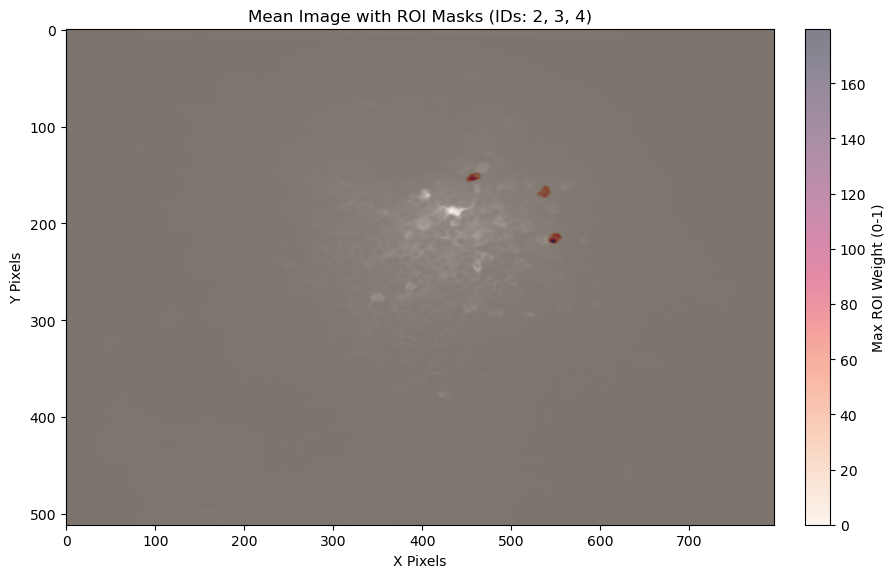

In [5]:
if nwb:
    try:
        roi_table = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"]
        is_cell_column = roi_table["iscell"][:]
        cell_indices = np.where(is_cell_column[:, 0] == 1)[0]

        if len(cell_indices) >= 3:
            selected_roi_indices_in_cells_array = cell_indices[:3]
            selected_roi_ids = roi_table.id[selected_roi_indices_in_cells_array]

            mean_img = nwb.processing["ophys"]["Backgrounds_0"].images["meanImg"].data[:]
            img_dims = nwb.acquisition["TwoPhotonSeries"].dimension[:] # e.g., [height, width]

            # Create a composite image of selected ROI masks
            # Initialize with zeros, same dimensions as the imaging plane
            roi_masks_combined = np.zeros((img_dims[0], img_dims[1]), dtype=float)

            for i, roi_idx in enumerate(selected_roi_indices_in_cells_array):
                # pixel_mask is a list of [y, x, weight] tuples for each ROI
                pixel_mask_data = roi_table["pixel_mask"][roi_idx]
                for y_coord, x_coord, weight in pixel_mask_data:
                    # Ensure coordinates are within bounds
                    y = int(y_coord)
                    x = int(x_coord)
                    if 0 <= y < img_dims[0] and 0 <= x < img_dims[1]:
                        # Use max to handle overlapping ROIs, showing the strongest presence
                        roi_masks_combined[y, x] = max(roi_masks_combined[y, x], weight)
            
            # Create plot - do not use seaborn styling for images
            plt.style.use('default') # Reset to default matplotlib style for image
            plt.figure(figsize=(10, 10 * img_dims[0]/img_dims[1] if img_dims[1] > 0 else 10)) # Adjust aspect ratio
            plt.imshow(mean_img, cmap='gray', aspect='auto')
            plt.imshow(roi_masks_combined, cmap=sns.cm.rocket_r, alpha=0.5, aspect='auto') # Overlay masks
            plt.title(f"Mean Image with ROI Masks (IDs: {', '.join(map(str, selected_roi_ids))})")
            plt.xlabel("X Pixels")
            plt.ylabel("Y Pixels")
            plt.colorbar(label="Max ROI Weight (0-1)", fraction=0.046, pad=0.04) # Add colorbar for mask weights
            plt.show()
        else:
            print(f"Found only {len(cell_indices)} cells, need at least 3 to plot ROI masks.")

    except KeyError as e:
        print(f"Ophysiology data (Backgrounds_0, ImageSegmentation, or TwoPhotonSeries) not found: {e}")
    except Exception as e:
        print(f"An error occurred while plotting ROI masks: {e}")
else:
    print("NWB file not loaded. Skipping ROI masks plot.")

The image above shows the mean fluorescence image from the 2-photon recording session in hippocampal CA1. Overlaid are the spatial masks for the same three selected ROIs (presumed neurons) plotted previously. This visualization helps to confirm that the ROIs correspond to cellular structures and shows their relative locations within the imaged field of view. The color intensity of the overlay (scaled by the colorbar "Max ROI Weight") represents the maximum weight of any pixel belonging to one of the selected ROIs, indicating the confidence or contribution of that pixel to the ROI definition. This helps in spatially localizing the source of the fluorescence traces.

## Summary and Future Directions

This notebook demonstrated how to:
*   Access and load a Dandiset and one of its NWB files using the DANDI API and PyNWB.
*   Inspect basic metadata and understand the general structure of the NWB file.
*   Visualize behavioral data (mouse position).
*   Visualize 2-photon imaging data (deconvolved fluorescence traces and ROI masks).

**Findings:**
From the selected NWB file (`sub-m11/sub-m11_ses-03_behavior+ophys.nwb`):
*   The mouse exhibits highly repetitive movement patterns on the virtual linear track.
*   The selected ROIs (neurons) show distinct, spike-like activity patterns over time, with some periods of apparent co-activity.
*   The spatial masks of these ROIs are localized within the imaging field of view, corresponding to presumed cellular structures.

**Possible Future Directions for Analysis:**
Researchers could extend this analysis by:
1.  **Correlating Neural Activity with Behavior:** Investigate how the activity of individual neurons or populations of neurons relates to specific behavioral events (e.g., position on the track, speed, reward delivery, trial initiation/termination). This could involve creating peri-stimulus time histograms (PSTHs) or calculating place fields.
2.  **Population Analysis:** Explore patterns of activity across the entire recorded neural population. Techniques like Principal Component Analysis (PCA) or other dimensionality reduction methods could reveal dominant modes of population activity. Network analysis could uncover functional connectivity between neurons.
3.  **Learning-Related Changes:** If data from multiple sessions or across learning stages is available, researchers could examine how neural representations and behavioral performance change over time or with experience (e.g., as the mouse learns new reward locations).
4.  **Cross-Subject/Session Comparison:** Analyze data from different subjects or sessions to identify consistent patterns or variability in neural coding and behavior.
5.  **Advanced Ophysiology Analysis:** Explore other aspects of the ophysiology data, such as the raw fluorescence (F), neuropil signals, or compare deconvolved activity with raw fluorescence.
6.  **Integration with other Data Modalities:** If other types of data were recorded (e.g., LFP), explore their relationship with the 2-photon imaging data.

This notebook provides a starting point for exploring this rich dataset. The tools and techniques demonstrated can be adapted and expanded for more in-depth investigations into the hippocampal population code for experience relative to reward.

In [6]:
# Close the NWB file if it was opened
if 'io' in locals() and io: # Check if io exists and is not None
    try:
        io.close()
        print("NWB file closed.")
    except Exception as e:
        print(f"Error closing NWB file (it might have already been closed or not opened properly): {e}")

NWB file closed.
